In [1]:

import pandas as pd
import numpy as np
 
QE = pd.read_csv("https://raw.githubusercontent.com/DATAUNIRIO/Base_de_dados/master/QE.csv") 



In [ ]:
carro = pd.read_csv("https://raw.githubusercontent.com/DATAUNIRIO/Base_de_dados/master/Cars93.csv") 

In [ ]:
# listar os objetos
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module    <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [ ]:
# diferenças de listas e arrays
# listas
minha_lista = [1,2,3]
minha_lista2 = [4,5,6]
minha_lista + minha_lista2



array([4, 6, 8])

In [ ]:
# diferenças de listas e arrays
# array
vetor1 = np.array([1,2,3])
vetor2 = np.array([3,4,5])
#vetor + 1
vetor1+vetor2


In [ ]:
# as 3 primeiras linhas do banco de dados
print(carro.head(3))

   Unnamed: 0 Manufacturer    Model     Type  Min.Price  Price  Max.Price  \
0           1        Acura  Integra    Small       12.9   15.9       18.8   
1           2        Acura   Legend  Midsize       29.2   33.9       38.7   
2           3         Audi       90  Compact       25.9   29.1       32.3   

   MPG.city  MPG.highway             AirBags  ... Passengers Length  \
0        25           31                None  ...          5    177   
1        18           25  Driver & Passenger  ...          5    195   
2        20           26         Driver only  ...          5    180   

   Wheelbase  Width  Turn.circle  Rear.seat.room Luggage.room  Weight  \
0        102     68           37            26.5         11.0    2705   
1        115     71           38            30.0         15.0    3560   
2        102     67           37            28.0         14.0    3375   

    Origin           Make  
0  non-USA  Acura Integra  
1  non-USA   Acura Legend  
2  non-USA        Audi 90  



In [ ]:
carro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

## VARIÁVEL QUALITATIVA
Vamos fazer:
1. tabela em números absolutos
2. proporções
3. gráfico de pizza
4. gráfico de barras

In [ ]:
#fazendo tabelas
tabela_simples = carro.Type.value_counts()
tabela_simples

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [ ]:
#fazendo proporções
#tabela_simples/tabela_simples.sum()*100

round(tabela_simples/tabela_simples.sum()*100,2)

Midsize    23.66
Small      22.58
Compact    17.20
Sporty     15.05
Large      11.83
Van         9.68
Name: Type, dtype: float64

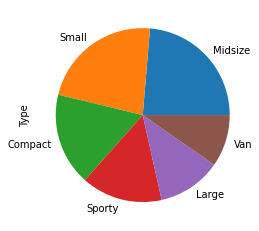

In [ ]:
# grafico de pizza
tabela_simples.plot.pie()


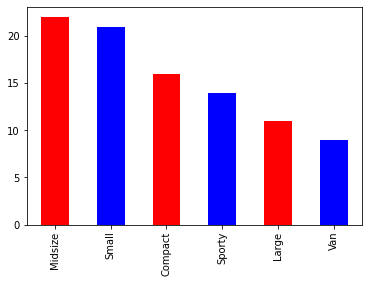

In [ ]:
# grafico de barras
#tabela_simples.plot.bar()
#tabela_simples.plot.bar(color="red")
tabela_simples.plot.bar(color=["red","blue"])

# VARIÁVEL QUANTITATIVA
Vamos fazer: 
*   Resumos
*   Histograma



In [ ]:
# O ponto (".") pode ser o $ ou ::
# aqui vou usar como $ para selecionar variáveis
carro.Price.describe()

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

In [ ]:
carro.Horsepower.describe()

count     93.000000
mean     143.827957
std       52.374410
min       55.000000
25%      103.000000
50%      140.000000
75%      170.000000
max      300.000000
Name: Horsepower, dtype: float64

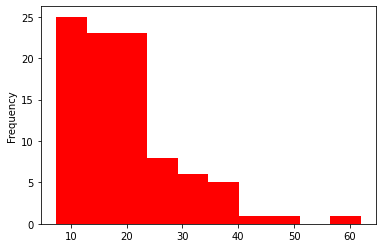

In [ ]:
# histograma
#carro.Price.plot.hist()
carro.Price.plot.hist(color="red")


# DUAS VARIÁVEIS QUALITATIVAS
Vamos fazer: 
*   Tabela para duas variáveis (crosstab)
*   barplot para duas variáveis

In [ ]:
#tabela = pd.crosstab(carro.Type, carro.AirBags)
tabela = pd.crosstab(carro.Type, carro.AirBags, rownames=['Tipo de Carro'], colnames=['Tipo de AirBag'])
tabela

Tipo de AirBag,Driver & Passenger,Driver only,None
Tipo de Carro,,,
Compact,2,9,5
Large,4,7,0
Midsize,7,11,4
Small,0,5,16
Sporty,3,8,3
Van,0,3,6


In [ ]:
# soma da coluna (100 na coluna)
round(tabela/tabela.sum()*100,2)

Tipo de AirBag,Driver & Passenger,Driver only,None
Tipo de Carro,,,
Compact,12.50,20.93,14.71
Large,25.00,16.28,0.00
Midsize,43.75,25.58,11.76
Small,0.00,11.63,47.06
Sporty,18.75,18.60,8.82
Van,0.00,6.98,17.65


In [ ]:
# abordagem melhor: use o normalise
# normalise por total (all), linhas (index), ou colunas (columns).
tabela_linha = pd.crosstab(carro.Type, carro.AirBags, rownames=['Tipo de Carro'], colnames=['Tipo de AirBag'], normalize='index')
tabela_linha

Tipo de AirBag,Driver & Passenger,Driver only,None
Tipo de Carro,,,
Compact,0.125000,0.562500,0.312500
Large,0.363636,0.636364,0.000000
Midsize,0.318182,0.500000,0.181818
Small,0.000000,0.238095,0.761905
Sporty,0.214286,0.571429,0.214286
Van,0.000000,0.333333,0.666667


In [ ]:
# normalise por colunas (columns).
tabela_coluna = pd.crosstab(carro.Type, carro.AirBags, rownames=['Tipo de Carro'], colnames=['Tipo de AirBag'], normalize='columns')
round(tabela_coluna*100,2)

Tipo de AirBag,Driver & Passenger,Driver only,None
Tipo de Carro,,,
Compact,12.50,20.93,14.71
Large,25.00,16.28,0.00
Midsize,43.75,25.58,11.76
Small,0.00,11.63,47.06
Sporty,18.75,18.60,8.82
Van,0.00,6.98,17.65


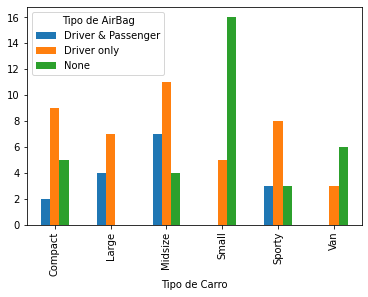

In [ ]:
tabela.plot.bar()

# Uma variável qualitativa e uma variável quantitativa
Vamos fazer:
1. Resumo por grupos
2. Boxplot


In [ ]:
# parecido com o pipe
#(carro
# .groupby(["Type", "AirBags"])
# .agg(
#    preco_medio = ("Price", "mean"),
#    preco_mediano = ("Price", "median") 
# ))

carro.groupby("Type").agg(preco_medio = ("Price", "mean"),preco_mediano = ("Price", "median"))


,preco_medio,preco_mediano
Type,,
Compact,18.212500,16.15
Large,24.300000,20.90
Midsize,27.218182,26.20
Small,10.166667,10.00
Sporty,19.392857,16.80
Van,19.100000,19.10


In [ ]:
carro.groupby("Type").agg(minimo= ("Price","min"),preco_medio = ("Price", "mean"),maximo = ("Price", "max"))


,minimo,preco_medio,maximo
Type,,,
Compact,11.1,18.212500,31.9
Large,18.4,24.300000,36.1
Midsize,13.9,27.218182,61.9
Small,7.4,10.166667,15.9
Sporty,10.0,19.392857,38.0
Van,16.3,19.100000,22.7


In [ ]:
carro.groupby("Type").agg(preco_medio = ("Price", "mean"),desvio_padrao = ("Price", "std"))


,preco_medio,desvio_padrao
Type,,
Compact,18.212500,6.686890
Large,24.300000,6.337507
Midsize,27.218182,12.264841
Small,10.166667,1.953288
Sporty,19.392857,7.974716
Van,19.100000,1.878164


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


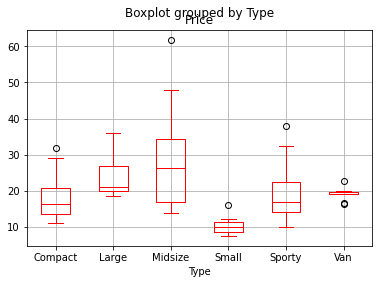

In [ ]:
carro.boxplot("Price",by='Type',color="red")

# DUAS VARIÁVEIS QUANTITATIVAS
1. Diagrama de dispersão
2. Coeficiente de correlação

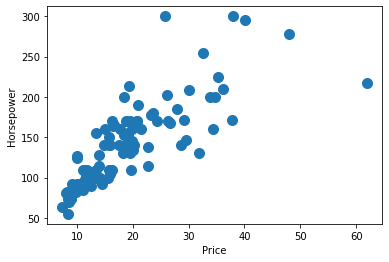

In [ ]:
# Draw a scatter plot
carro.plot.scatter(x = 'Price', y = 'Horsepower', s = 100);

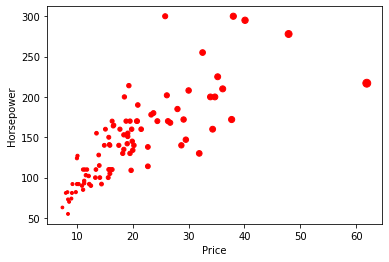

In [ ]:
# Draw a scatter plot and here size of dots determined by price
carro.plot.scatter(x = 'Price', y = 'Horsepower', s = 'Price', c = 'red')

In [ ]:
# The Pandas Plot Function
#df.plot(
#    x=None,         # Values to use for x axis
#    y=None,         # Values to use for y axis
#    kind='line',    # The type of chart to make
#    title=None,     # The title to use
#    legend=False,   # Whether to show a legend
#    xlabel=None,    # What the x-axis label should be
#    ylabel=None     # What the y-axis label should be
#    c=None,         # The color to use for the dots
#    s=None          # How to size dots (single number or column)
#)

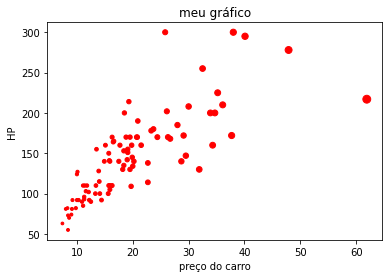

In [ ]:
carro.plot.scatter(x = 'Price', y = 'Horsepower', s = 'Price', c = 'red',title="meu gráfico",xlabel="preço do carro",ylabel="HP")

In [ ]:
carro.filter(["Price", "Horsepower"]).corr()

,Price,Horsepower
Price,1.000000,0.788218
Horsepower,0.788218,1.000000


In [ ]:
 carro.corr() 

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Unnamed: 0,1.000000,-0.144463,-0.137277,-0.126567,0.161808,0.137317,-0.338286,-0.233012,0.167772,0.226389,-0.179034,-0.142252,-0.277911,-0.244888,-0.293592,-0.275867,-0.126972,-0.171177,-0.220525
Min.Price,-0.144463,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,-0.137277,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,-0.126567,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,0.161808,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,0.137317,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,-0.338286,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,-0.233012,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,0.167772,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,0.226389,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264


In [ ]:
 carro.filter(["Price", "Horsepower"]).corr(method='spearman') 

,Price,Horsepower
Price,1.00000,0.85839
Horsepower,0.85839,1.00000


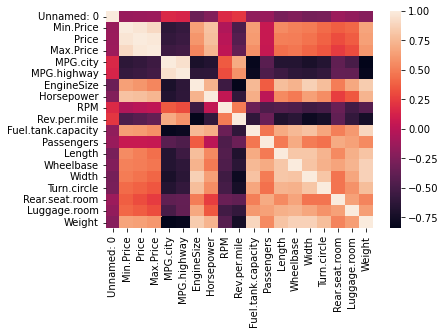

In [ ]:
# plot the heatmap
import seaborn as sns
%matplotlib inline

correlacao = carro.corr() 
sns.heatmap(correlacao)

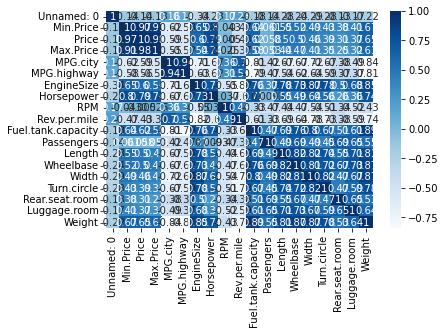

In [ ]:
sns.heatmap(correlacao, cmap="Blues", annot=True)

In [ ]:
# posso fazer:
(carro.assign(
     tem_na = carro.Price.isna(),
     tem_audi = carro.Manufacturer.str.contains("Audi")
     # esse é um jeito de você acessar métodos mais "básicos" de um objeto
     ))


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,tem_na,tem_audi
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,False,False
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,False,False
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,102,67,37,28.0,14.0,3375,non-USA,Audi 90,False,True
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,106,70,37,31.0,17.0,3405,non-USA,Audi 100,False,True
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan,False,False
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat,False,False
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado,False,False
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,104,67,37,29.5,14.0,2985,non-USA,Volvo 240,False,False


In [ ]:
# (1) selecionar linha com o query
# (2) selecionar coluna com o filter
# (3) criar colunas com o assign

carro.query("Type=='Small'").Manufacturer


0          Acura
22         Dodge
23         Dodge
28         Eagle
30          Ford
31          Ford
38           Geo
41         Honda
43       Hyundai
44       Hyundai
52         Mazda
53         Mazda
61    Mitsubishi
63        Nissan
72       Pontiac
78        Saturn
79        Subaru
80        Subaru
82        Suzuki
83        Toyota
87    Volkswagen
Name: Manufacturer, dtype: object

In [ ]:
#carro.query("Type !='Small'").Manufacturer

# carro.query("Type == 'Small' | Type == 'Midsize'")

carro.query("Type in ('Small','Midsize')")



,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
10,11,Cadillac,Seville,Midsize,37.5,40.1,42.7,16,25,Driver & Passenger,...,5,204,111,74,44,31.0,14.0,3935,USA,Cadillac Seville
14,15,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
22,23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,...,5,174,98,66,32,26.5,11.0,2270,USA,Dodge Colt
23,24,Dodge,Shadow,Small,8.4,11.3,14.2,23,29,Driver only,...,5,172,97,67,38,26.5,13.0,2670,USA,Dodge Shadow


In [ ]:
carro.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [ ]:
len(carro)

93